# **Coronavirus tweets NLP - Text Classification**

In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import keras
from keras.layers import Dense,LSTM,Embedding,Input,GlobalMaxPool1D
from keras.models import Sequential
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings('ignore')

print('All modules are imported!!')

All modules are imported!!


In [3]:
#Load the data
data=pd.read_csv('/content/drive/MyDrive/Datasets/Corona Tweet Sentiment Analysis/Corona_NLP_train.csv',encoding='latin1',parse_dates=['TweetAt'])
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
data.describe(include='O')

,Location,OriginalTweet,Sentiment
count,32567,41157,41157
unique,12220,41157,5
top,London,Spain is now controlling how many ppl can ente...,Positive
freq,540,1,11422


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

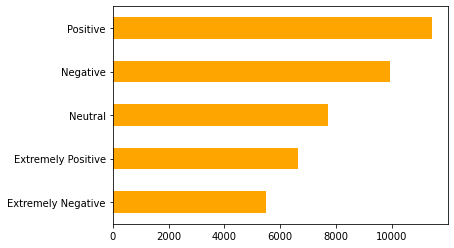

In [7]:
data.Sentiment.value_counts().sort_values().plot(kind = 'barh',color="orange")

In [8]:
data.Sentiment=data.Sentiment.replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})

In [9]:
train_text,val_text,train_label,val_label=train_test_split(data.OriginalTweet,data.Sentiment,
                                                             test_size=0.15,random_state=42)

In [10]:
val_text

31089     Without the there would not be any problem wh...
35564    Rice &amp; wheat prices surge amid fears Covid...
144      When the government says to start social dista...
8202     What the shops are doing is obeying the law of...
31720    Kaduna State Task Force on Covid 19 led by the...
                               ...                        
3803     #coronavirus Shopping online with https://t.co...
21486    #toiletpaper \r\r\n@ProcterGamble \r\r\n@Georg...
10012    @SimoneSchnall Interesting read. This theory c...
38148    Hi This is a little reminder to use plenty han...
33616    How will we come through the other side of the...
Name: OriginalTweet, Length: 6174, dtype: object

In [11]:
lbl_encoder=LabelEncoder()
train_label_codes=lbl_encoder.fit_transform(train_label)

In [12]:
lbl_encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [13]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        sentence=re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ',sentence)
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>1]

In [14]:
tokenizer=CountVectorizer(max_features=5000,stop_words='english',lowercase=True,tokenizer=Lemmatizer())

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
train_x=tokenizer.fit_transform(train_text).toarray()

In [17]:
tokenizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <__main__.Lemmatizer at 0x7f8fb2385210>,
 'vocabulary': None}

In [18]:
feature_names=tokenizer.get_feature_names()

In [19]:
val_x=tokenizer.transform(val_text).toarray()
val_label_codes=lbl_encoder.transform(val_label)

In [20]:
from sklearn.linear_model import LogisticRegression
model_p1=LogisticRegression()
model_p1.fit(train_x,train_label_codes)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Validation classification report',classification_report(val_label_codes,model_p1.predict(val_x)))
print('Training classification report',classification_report(train_label_codes,model_p1.predict(train_x)))

Validation classification report               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2306
           1       0.69      0.72      0.70      1176
           2       0.83      0.83      0.83      2692

    accuracy                           0.79      6174
   macro avg       0.78      0.78      0.78      6174
weighted avg       0.79      0.79      0.79      6174

Training classification report               precision    recall  f1-score   support

           0       0.90      0.89      0.89     13092
           1       0.82      0.84      0.83      6537
           2       0.91      0.91      0.91     15354

    accuracy                           0.89     34983
   macro avg       0.88      0.88      0.88     34983
weighted avg       0.89      0.89      0.89     34983



In [ ]:
data.Sentiment=lbl_encoder.transform(data.Sentiment)

In [ ]:
df=data.set_index('TweetAt').resample('W').count()

[]

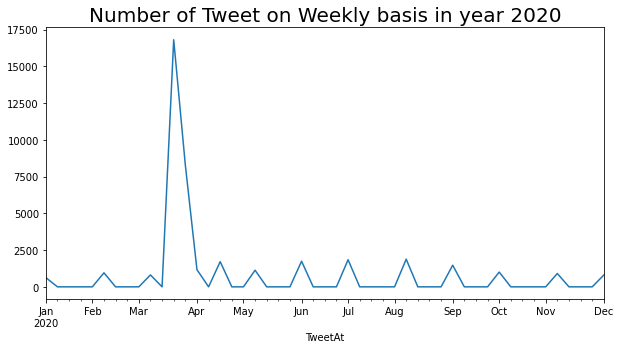

In [ ]:
plt.figure(figsize=(10,5))
df['OriginalTweet'].plot()
plt.title('Number of Tweet on Weekly basis in year 2020',fontdict={'size':'20'})
plt.plot()

In [1]:
plt.figure(figsize=(10,10))
plt.pie(train_label.value_counts(),explode=[0.01,0.01,0.001],colors=['orange','pink','blue'],
        labels=['Positive','Negative','Neutral'],autopct='%0.2f%%',radius=1,startangle=45)
plt.title('Sentiments',fontdict={'size':'20'})
plt.show()

NameError: ignored

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',patience=3)
reduceLR=ReduceLROnPlateau(monitor='val_accuarcy',patience=2)

In [ ]:
token=Tokenizer(num_words=5000,oov_token=Lemmatizer())
token.fit_on_texts(train_text)
train_x_2=token.texts_to_sequences(train_text)
train_x_2=pad_sequences(train_x_2,maxlen=60,padding='post',truncating='post')

In [ ]:
val_x_2=token.texts_to_sequences(val_text)
val_x_2=pad_sequences(val_x_2,maxlen=60,padding='post',truncating='post')

In [ ]:
embedding_dimension=32
v=len(token.word_index)
model=Sequential()
model.add(Input(shape=(60,)))
model.add(Embedding(v+1,embedding_dimension))
# model.add(Input(shape=(train_x.shape[1],)))
model.add(LSTM(64,return_sequences=True))
# model.add(Dense(128))
model.add(GlobalMaxPool1D())
model.add(Dense(64))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(train_x_2,train_label_codes,validation_data=(val_x_2,val_label_codes),
            epochs=20,batch_size=50,callbacks=[reduceLR,early_stop])

Epoch 1/20
700/700 [==============================] - 68s 71ms/step - loss: 0.8409 - accuracy: 0.5949 - val_loss: 0.4715 - val_accuracy: 0.8434
Epoch 2/20
700/700 [==============================] - 48s 69ms/step - loss: 0.4101 - accuracy: 0.8691 - val_loss: 0.4176 - val_accuracy: 0.8635
Epoch 3/20
700/700 [==============================] - 49s 70ms/step - loss: 0.3307 - accuracy: 0.8916 - val_loss: 0.4071 - val_accuracy: 0.8654
Epoch 4/20
700/700 [==============================] - 50s 71ms/step - loss: 0.2893 - accuracy: 0.9062 - val_loss: 0.4183 - val_accuracy: 0.8638
Epoch 5/20
700/700 [==============================] - 49s 70ms/step - loss: 0.2657 - accuracy: 0.9131 - val_loss: 0.4366 - val_accuracy: 0.8596
Epoch 6/20
700/700 [==============================] - 49s 70ms/step - loss: 0.2290 - accuracy: 0.9251 - val_loss: 0.4642 - val_accuracy: 0.8544


[]

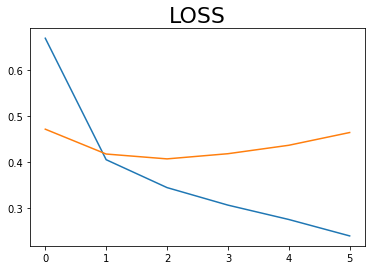

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('LOSS',fontdict={'size':'22'})
plt.plot()

[]

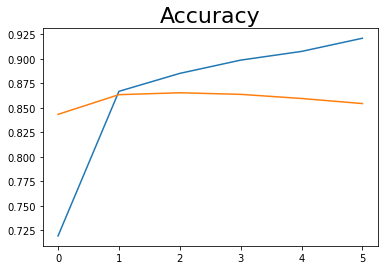

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Accuracy',fontdict={'size':'22'})
plt.plot()

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/Datasets/Corona Tweet Sentiment Analysis/Corona_NLP_test.csv',encoding='latin1')

In [ ]:
test_data['Sentiment']=test_data['Sentiment'].replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})

In [ ]:
test_label=lbl_encoder.transform(test_data['Sentiment'])

In [ ]:
test_x=test_data.OriginalTweet

In [ ]:
test_x_1=tokenizer.transform(test_x).toarray()

In [ ]:
print(classification_report(test_label,model_p1.predict(test_x_1)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1633
           1       0.61      0.66      0.63       619
           2       0.79      0.81      0.80      1546

    accuracy                           0.77      3798
   macro avg       0.74      0.74      0.74      3798
weighted avg       0.77      0.77      0.77      3798



In [ ]:
test_x_2=token.texts_to_sequences(test_data['OriginalTweet'])
test_x_2=pad_sequences(test_x_2,maxlen=60,padding='post',truncating='post')

In [ ]:
print(classification_report(test_label,model.predict_classes(test_x_2)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.80      0.76      0.78       619
           2       0.84      0.88      0.86      1546

    accuracy                           0.84      3798
   macro avg       0.83      0.83      0.83      3798
weighted avg       0.84      0.84      0.84      3798

